In [65]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Dataset Information

## 🛍️ [Predict Customer Purchase Behavior Dataset](https://www.kaggle.com/datasets/rabieelkharoua/predict-customer-purchase-behavior-dataset)

### Overview
Exploring Consumer Trends: Unveiling Patterns in Purchase Behavior. This dataset provides comprehensive information for analyzing and predicting customer purchase behavior patterns.

### Dataset Details
- **Source**: [Kaggle - Rabie El Kharoua](https://www.kaggle.com/rabieelkharoua)
- **Published**: June 19, 2024
- **Format**: CSV
- **Category**: Business Analytics, Consumer Behavior, Machine Learning

### Key Applications
- Customer behavior analysis
- Purchase prediction modeling
- Consumer trends exploration
- Marketing strategy optimization
- Predictive analytics for retail



In [41]:
data=pd.read_csv("customer_purchase_data.csv")
data.shape

(1500, 9)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [43]:
# Checking NULL Values
data.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [44]:
cols=data.columns
for c in cols:
    print(f"Column : {c}  Datatype: {data[c].dtype}  ")

Column : Age  Datatype: int64  
Column : Gender  Datatype: int64  
Column : AnnualIncome  Datatype: float64  
Column : NumberOfPurchases  Datatype: int64  
Column : ProductCategory  Datatype: int64  
Column : TimeSpentOnWebsite  Datatype: float64  
Column : LoyaltyProgram  Datatype: int64  
Column : DiscountsAvailed  Datatype: int64  
Column : PurchaseStatus  Datatype: int64  


In [45]:
data.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


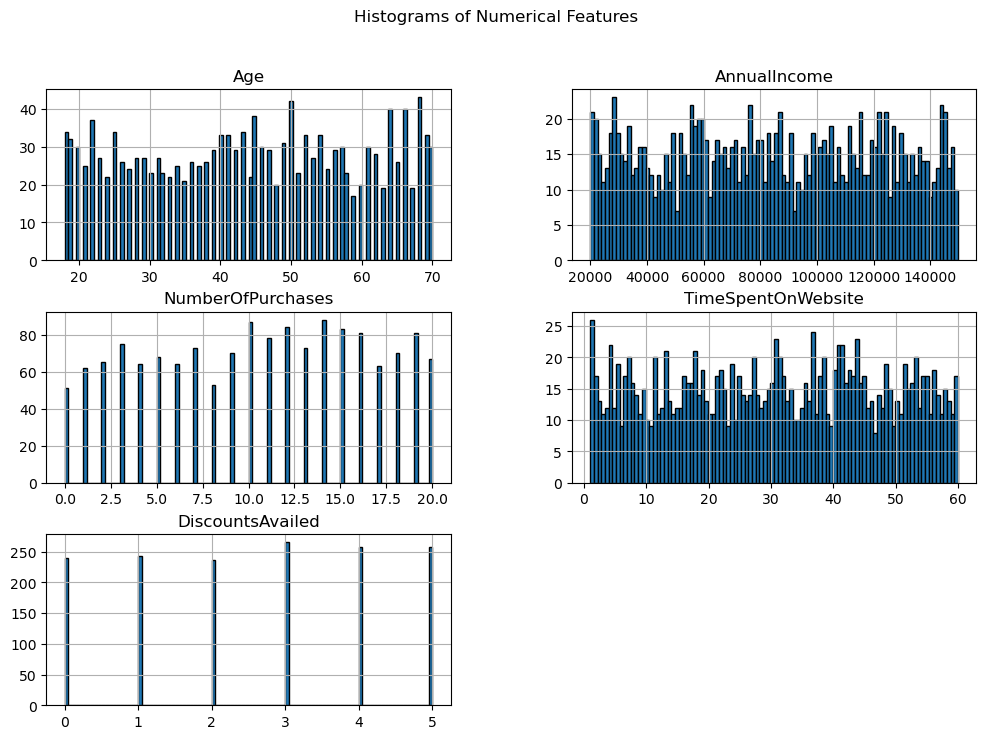

In [62]:
numeric_cols = ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'DiscountsAvailed']

data[numeric_cols].hist(figsize=(12,8), bins=100, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

### Most of the Data has Uniform Distribution

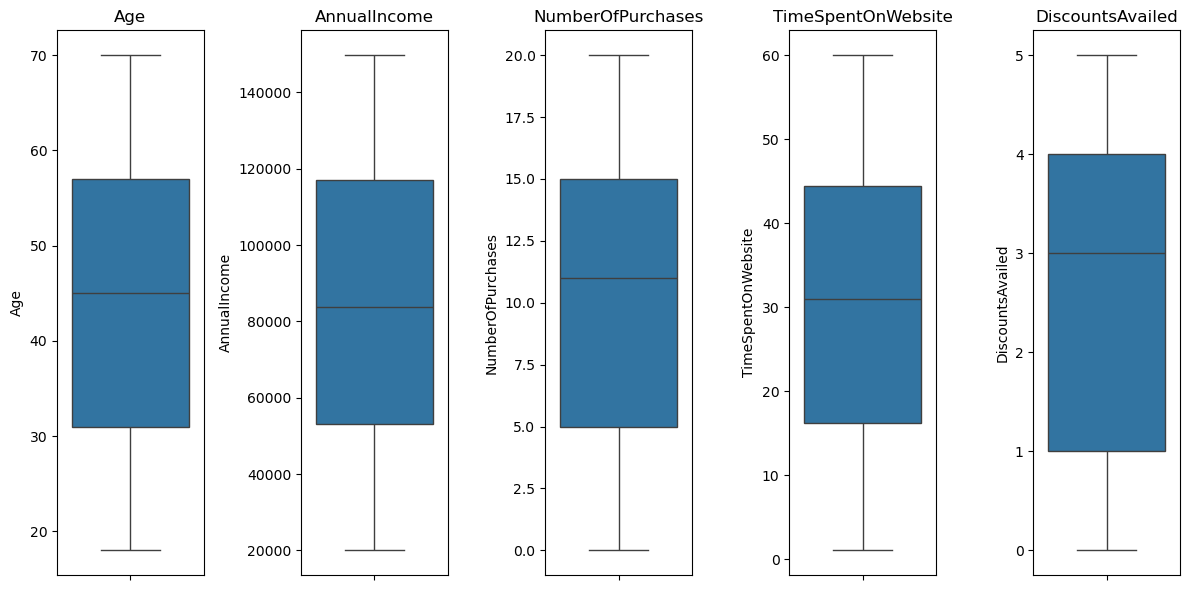

In [49]:
plt.figure(figsize=(12,6))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i+1)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# No Outliers Exist

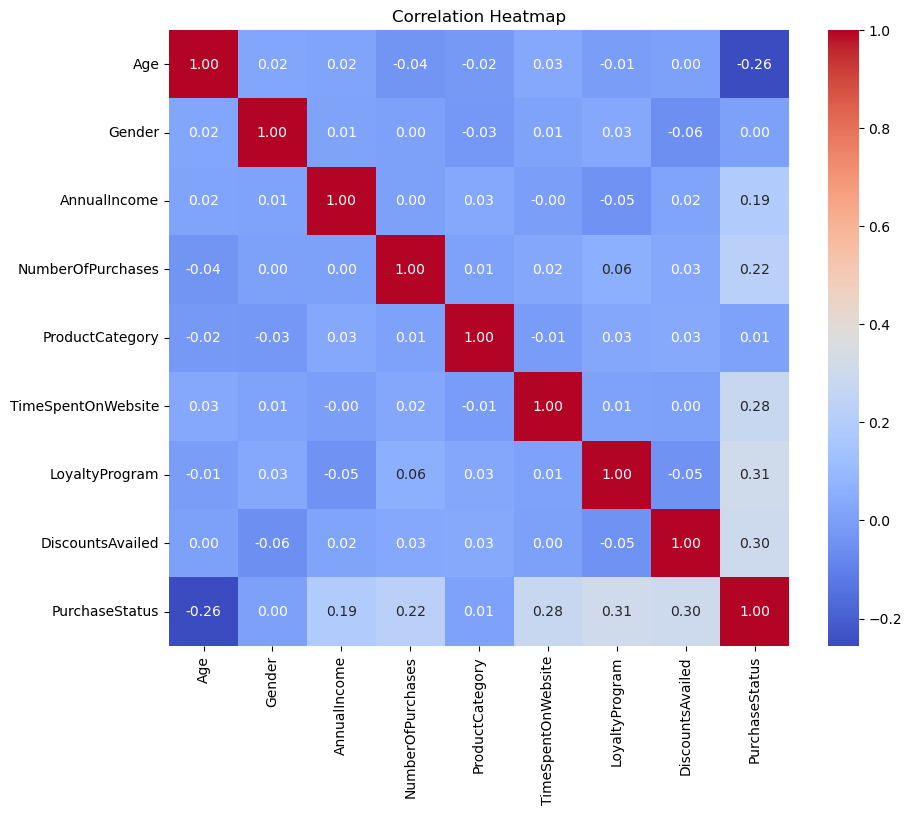

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Correlation Insights

## 1. Target Variable (`PurchaseStatus`) Correlations
- **Strongest positive correlations:**
  - `LoyaltyProgram` (0.311) → Users in loyalty programs are more likely to purchase.
  - `TimeSpentOnWebsite` (0.277) → More time spent increases purchase likelihood.
- **Moderate positive correlations:**
  - `DiscountsAvailed` (0.303)
  - `NumberOfPurchases` (0.223)
  - `AnnualIncome` (0.188)
- **Negative correlation:**
  - `Age` (-0.256) → Older users are slightly less likely to purchase.
- **Minimal correlation:**
  - `Gender` (0.003)
  - `ProductCategory` (0.007)

## 2. Feature Relationships
- Most features have **weak inter-correlations**, so multicollinearity is not a major concern.
- Minor correlations exist but are not strong enough to require removal.

## 3. Potential Predictive Features
- `TimeSpentOnWebsite`
- `LoyaltyProgram`
- `DiscountsAvailed`
- `NumberOfPurchases`
- `AnnualIncome` and `Age` may also contribute.



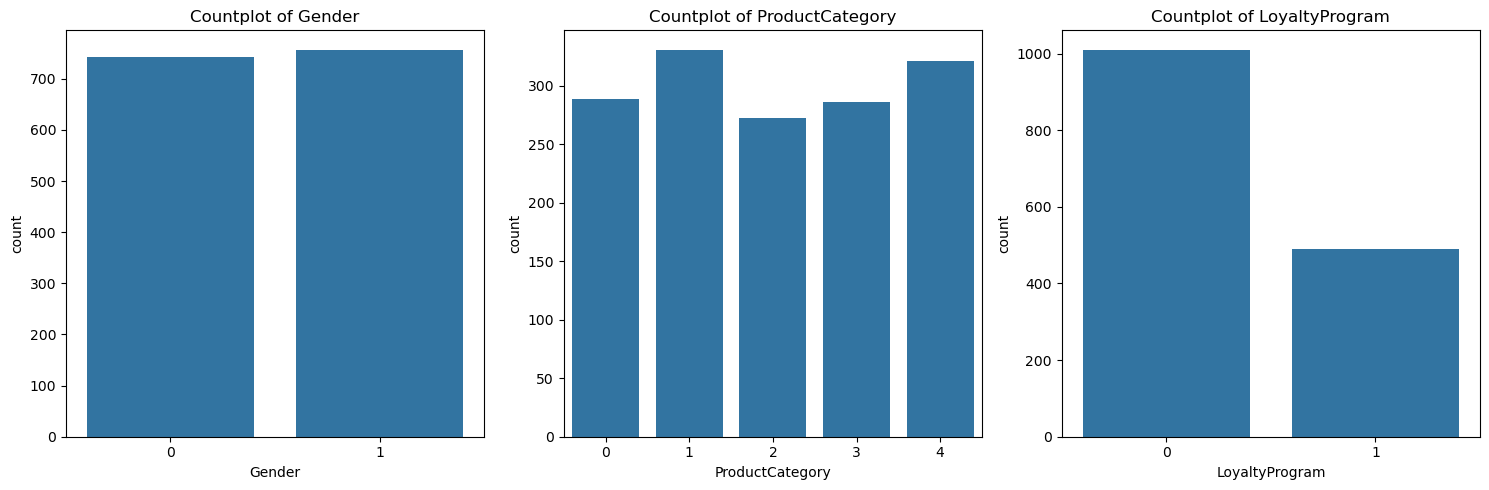

In [53]:
categorical_cols = ['Gender', 'ProductCategory', 'LoyaltyProgram']

plt.figure(figsize=(15,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i+1)
    sns.countplot(data=data, x=col)
    plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()


Logistic Regression Metrics:
{'Model': 'Logistic Regression', 'Accuracy': 0.8333333333333334, 'Precision': 0.875, 'Recall': 0.7109375}
Confusion Matrix:
 [[159  13]
 [ 37  91]]


<Axes: >

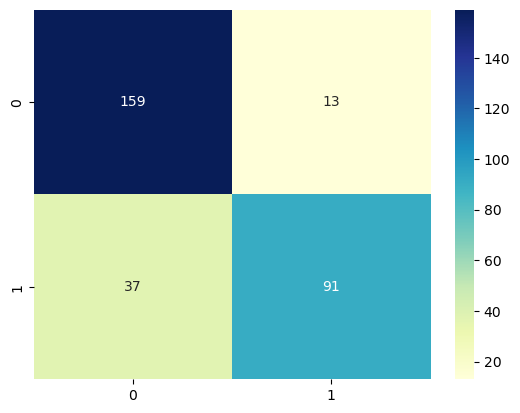

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Train Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluate
logreg_metrics = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_logreg),
    "Precision": precision_score(y_test, y_pred_logreg),
    "Recall": recall_score(y_test, y_pred_logreg)
}

# Confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

print("Logistic Regression Metrics:")
print(logreg_metrics)
print("Confusion Matrix:\n", cm_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='YlGnBu')


In [74]:
from sklearn.neighbors import KNeighborsClassifier

k_values = [3, 5, 7, 9, 11]
knn_results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    
    metrics = {
        "Model": f"KNN (K={k})",
        "Accuracy": accuracy_score(y_test, y_pred_knn),
        "Precision": precision_score(y_test, y_pred_knn),
        "Recall": recall_score(y_test, y_pred_knn),
        "Confusion Matrix": confusion_matrix(y_test, y_pred_knn)
    }
    knn_results.append(metrics)

knn_df = pd.DataFrame(knn_results)
print("KNN Metrics for Multiple K Values:")
print(knn_df)


KNN Metrics for Multiple K Values:
        Model  Accuracy  Precision    Recall       Confusion Matrix
0   KNN (K=3)  0.820000   0.824561  0.734375  [[152, 20], [34, 94]]
1   KNN (K=5)  0.826667   0.839286  0.734375  [[154, 18], [34, 94]]
2   KNN (K=7)  0.840000   0.877358  0.726562  [[159, 13], [35, 93]]
3   KNN (K=9)  0.853333   0.888889  0.750000  [[160, 12], [32, 96]]
4  KNN (K=11)  0.840000   0.863636  0.742188  [[157, 15], [33, 95]]


In [77]:
# Combine Logistic Regression and KNN metrics
comparison_list = []

# Add Logistic Regression
comparison_list.append({
    "Model": "Logistic Regression",
    "Accuracy": logreg_metrics["Accuracy"],
    "Precision": logreg_metrics["Precision"],
    "Recall": logreg_metrics["Recall"]
})

# Add KNN models
for i in range(len(knn_results)):
    comparison_list.append({
        "Model": knn_results[i]["Model"],
        "Accuracy": knn_results[i]["Accuracy"],
        "Precision": knn_results[i]["Precision"],
        "Recall": knn_results[i]["Recall"]
    })

# Convert to DataFrame for easier viewing
comparison_df = pd.DataFrame(comparison_list)

print("\n--- Model Performance Comparison ---")
print(comparison_df)

# Choose best model based on Accuracy
best_index = comparison_df["Accuracy"].idxmax()
best_model = comparison_df.iloc[best_index]
print(f"\nBest Model: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.3f}")



--- Model Performance Comparison ---
                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.833333   0.875000  0.710938
1            KNN (K=3)  0.820000   0.824561  0.734375
2            KNN (K=5)  0.826667   0.839286  0.734375
3            KNN (K=7)  0.840000   0.877358  0.726562
4            KNN (K=9)  0.853333   0.888889  0.750000
5           KNN (K=11)  0.840000   0.863636  0.742188

Best Model: KNN (K=9) with Accuracy = 0.853


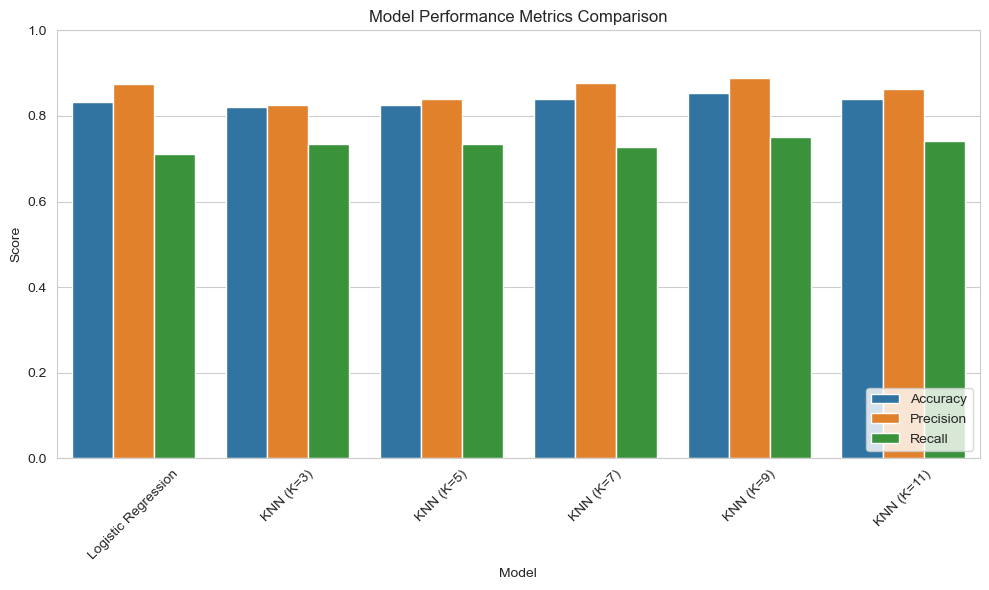

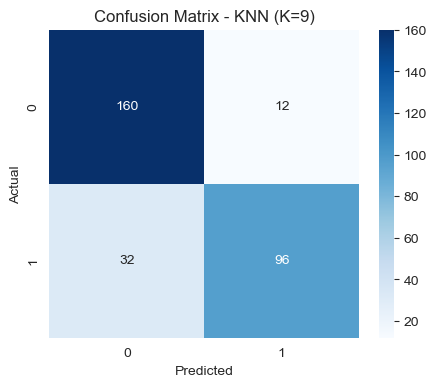

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Accuracy, Precision, Recall
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
comparison_plot = comparison_df.melt(id_vars="Model", value_vars=["Accuracy", "Precision", "Recall"],var_name="Metric", value_name="Score")
sns.barplot(x="Model", y="Score", hue="Metric", data=comparison_plot)
plt.title("Model Performance Metrics Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Confusion matrix heatmap for best model
if "KNN" in best_model['Model']:
    best_cm = knn_results[knn_df['Accuracy'].idxmax()]["Confusion Matrix"]
else:
    best_cm = cm_logreg
plt.figure(figsize=(5,4))
sns.heatmap(best_cm, annot=True, fmt='d', cmap="Blues")
plt.title(f"Confusion Matrix - {best_model['Model']}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [80]:
import joblib

# Determine which model is best
if "KNN" in best_model['Model']:
    # Extract K value from the model name
    k = int(best_model['Model'].split('=')[1].replace(')', ''))
    from sklearn.neighbors import KNeighborsClassifier
    best_model_instance = KNeighborsClassifier(n_neighbors=k)
    best_model_instance.fit(X_train_scaled, y_train)
else:
    from sklearn.linear_model import LogisticRegression
    best_model_instance = LogisticRegression()
    best_model_instance.fit(X_train_scaled, y_train)

# Save the model to a file
joblib.dump(best_model_instance, 'best_model.pkl')
print(f"Best model ({best_model['Model']}) saved as 'best_model.pkl'")
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


Best model (KNN (K=9)) saved as 'best_model.pkl'


['scaler.pkl']

In [82]:
%%file app.py
import streamlit as st
import pandas as pd
import joblib

# Load model and scaler
model = joblib.load('best_model.pkl')
scaler = joblib.load('scaler.pkl')

st.title("Customer Purchase Prediction")
st.write("Enter customer details to predict Purchase Status")

# Input fields with validation
age = st.number_input("Age", min_value=10, max_value=100, value=25, step=1)
gender = st.selectbox("Gender", [0, 1], format_func=lambda x: "Male" if x==0 else "Female")
annual_income = st.number_input("Annual Income ($)", min_value=0, max_value=1_000_000, value=50000, step=1000)
num_purchases = st.number_input("Number of Purchases", min_value=0, max_value=1000, value=5, step=1)
product_category = st.number_input("Product Category (ID)", min_value=0, max_value=50, value=1, step=1)
time_spent = st.number_input("Time Spent on Website (minutes)", min_value=0.0, max_value=1440.0, value=10.0, step=0.5)
loyalty_program = st.selectbox("Loyalty Program", [0, 1], format_func=lambda x: "No" if x==0 else "Yes")
discounts_availed = st.number_input("Discounts Availed", min_value=0, max_value=100, value=0, step=1)

# Button click for prediction
if st.button("Predict Purchase Status"):
    # Additional runtime validations
    errors = []
    if age < 10 or age > 100:
        errors.append("Age must be between 10 and 100.")
    if annual_income < 0:
        errors.append("Annual Income cannot be negative.")
    if num_purchases < 0:
        errors.append("Number of Purchases cannot be negative.")
    if time_spent < 0:
        errors.append("Time Spent cannot be negative.")
    if discounts_availed < 0:
        errors.append("Discounts Availed cannot be negative.")

    if errors:
        st.error(" | ".join(errors))
    else:
        # Create dataframe for model
        input_df = pd.DataFrame([[age, gender, annual_income, num_purchases, product_category,
                                  time_spent, loyalty_program, discounts_availed]],
                                columns=['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases',
                                         'ProductCategory', 'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed'])

        # Scale input
        input_scaled = scaler.transform(input_df)

        # Prediction
        prediction = model.predict(input_scaled)[0]
        probability = model.predict_proba(input_scaled)[0][1] if hasattr(model, "predict_proba") else None

        st.subheader("Prediction:")
        st.write("✅ Will Purchase" if prediction == 1 else "❌ Will Not Purchase")
        if probability is not None:
            st.write(f"Probability of Purchase: {probability:.2f}")
            


Overwriting app.py
